# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Global settings

In [ ]:
# For reproducibility
np.random.seed(42)

# 2. Data Exploration

## Import Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1M6d3MEmjtsKj4BuTKnAZlT18oEVEPFnfGXzsgYHw0qM/export?format=xlsx'
data = pd.read_excel(sheet_url)

In [ ]:
df = data #[['year', 'GDP', 'unemployment']]
df.head()

,year,GDP,unemployment,imflation,rate_gdp,SP500,GPR,USDX,WTI,gold
0,1960,540.197,6.6,1.457976,5.852488,58.11,NaN,NaN,2.91,35.27
1,1961,580.612,6.0,1.070724,7.481530,71.55,NaN,NaN,2.85,35.25
2,1962,612.280,5.5,1.198773,5.454245,63.10,NaN,NaN,2.85,35.23
3,1963,653.938,5.5,1.239669,6.803750,75.02,NaN,NaN,2.92,35.09
4,1964,697.319,5.0,1.278912,6.633809,84.75,NaN,NaN,2.92,35.10


In [ ]:
df.shape

(64, 2)

In [ ]:
print(df.info)

<bound method DataFrame.info of     year        GDP
0   1960    540.197
1   1961    580.612
2   1962    612.280
3   1963    653.938
4   1964    697.319
..   ...        ...
59  2019  21933.217
60  2020  22068.767
61  2021  24777.038
62  2022  26734.277
63  2023  28296.967

[64 rows x 2 columns]>


## Dealing with missing values

In [ ]:
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values per column:
GDP             0
unemployment    0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)
df

,GDP,unemployment
0,540.197,6.6
1,580.612,6.0
2,612.280,5.5
3,653.938,5.5
4,697.319,5.0
...,...,...
59,21933.217,3.6
60,22068.767,6.7
61,24777.038,3.9
62,26734.277,3.5


## Train & Test data splitting

### GDP over time

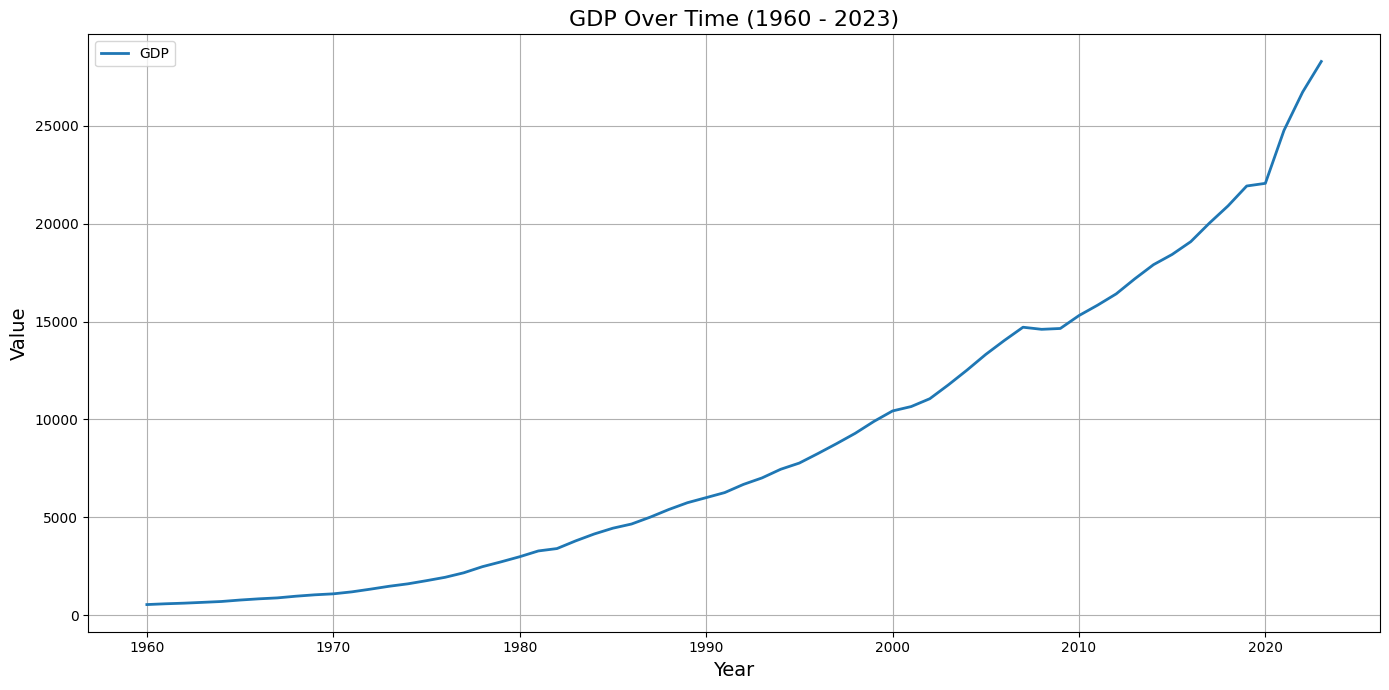

In [ ]:
#GDP
plt.figure(figsize=(14, 7))
plt.plot(df['year'], df['GDP'], linewidth=2, label='GDP')
plt.title('GDP Over Time (1960 - 2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Split data into (8:2) ratio

In [ ]:
# Define feature variables and target variable
X = df[['GDP']]
y = df['imflation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build Linear Regression Model

In [ ]:
# Create and train the linear regression model
model_gdp = LinearRegression(fit_intercept=True)
model_gdp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_gdp.predict(X_test)

# Evaluate the model
mae_gdp = mean_absolute_error(y_test, y_pred)
mse_gdp = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae_gdp}")
print(f"Mean Squared Error (MSE): {mse_gdp}")

Mean Absolute Error (MAE): 1.3951637837825714
Mean Squared Error (MSE): 3.1305634893739356
